# Model testing 

## Import libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data.dataloader import default_collate

import cv2

#%%
# Data Loader
import sys
# path = os.getcwd()
sys.path.insert(0, 'C:/Users/guzma/OneDrive/Documents/TEC/DTU/02456/Project/Github_Project/autotetris')
#from autotetris.dataloader import RoofDataSet
from dataloader import RoofDataSet, Transforms
from modeltraining import Resnet18, Resnet50, PadMSEloss, VarMSEloss, train_model, test_model
from model_resnet_test import ResNet

## Import path

In [13]:
path = 'C:/Users/guzma/OneDrive/Documents/TEC/DTU/02456/Project/Github_Project/Dataset/data_2022-11-01/meta_data.hdf'
input_path = path

## Data Loading

In [14]:
dataset = RoofDataSet(path, transform=Transforms(new_size=(256,256)), mode = "constant")
imp_path = dataset.image_paths +  "/"+dataset.id[0]+"-b15-otovowms.jpeg"
image = cv2.imread(imp_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#%%
# split the dataset into training, validation and test sets
# Create testset
len_test_set = int(0.1*len(dataset))
len_train_set = len(dataset) - len_test_set

-------------------- Initializing dataset --------------------
--> Metadata read
--> Num_panels computed
--> Samples with many panels dropped
--> Padding samples
--> Dataset ready


## Train test split

In [ ]:
train_dataset , test_dataset  = torch.utils.data.random_split(dataset, [len_train_set, len_test_set], generator=torch.Generator().manual_seed(1))


len_valid_set = int(0.1*len(train_dataset))
len_train_set = len(train_dataset) - len_valid_set

train_dataset, valid_dataset = torch.utils.data.random_split(train_dataset, [len_train_set, len_valid_set], generator=torch.Generator().manual_seed(1))

ValueError: Sum of input lengths does not equal the length of the input dataset!

In [10]:
print("The length of Train set is {}".format(len_train_set))
print("The length of Valid set is {}".format(len_valid_set))
print("The length of Test set is {}".format(len_test_set))


# shuffle and batch the datasets
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=lambda x: tuple(x_.to("cpu") for x_ in default_collate(x)))
# test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

The length of Train set is 30083
The length of Valid set is 3342
The length of Test set is 3713


## Model Training

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
#%%
image, centroid = next(iter(train_loader))
# print(image.shape, centroid.shape, centroid)
#%%
network = Resnet18()
network.to(device)
# print(network)

# Adjust network parameter
criterion = VarMSEloss()
optimizer = optim.Adam(network.parameters(), lr=0.01)

loss_min = 0.001
num_epochs = 1

# Train model
model = train_model(network, criterion, optimizer, num_epochs, train_loader, valid_loader, device)

torch.save(model, 'resnet18_constant_minus100_28_11_22_j.pt')

cuda
Valid Steps: 105/105  Loss: 39251.9047  
--------------------------------------------------
Epoch: 1  Train Loss: 57974.8996  Valid Loss: 39251.9047
--------------------------------------------------
Valid Steps: 105/105  Loss: 30307.3854 
--------------------------------------------------
Epoch: 2  Train Loss: 39408.7407  Valid Loss: 30307.3854
--------------------------------------------------
Valid Steps: 105/105  Loss: 32272.0290 
--------------------------------------------------
Epoch: 3  Train Loss: 34934.3205  Valid Loss: 32272.0290
--------------------------------------------------
Valid Steps: 105/105  Loss: 29536.1252 
--------------------------------------------------
Epoch: 4  Train Loss: 33042.6387  Valid Loss: 29536.1252
--------------------------------------------------
Valid Steps: 105/105  Loss: 23324.9246 
--------------------------------------------------
Epoch: 5  Train Loss: 30409.0778  Valid Loss: 23324.9246
--------------------------------------------------

In [7]:
def time_taken(second: float):
    """return the time taken in hh/mm/ss from total second count"""
    m, s = divmod(second, 60)
    h, m = divmod(m, 60)
    return "%d:%02d:%02d" % (h, m, s)
time_taken(5522.519075632095)

'1:32:02'

## Model Testing

In [6]:
model = Resnet50()
# path = 'trained_models/resnet18_wrap_27_11_22.pt'
path = 'C:/Users/guzma/OneDrive/Documents/TEC/DTU/02456/Project/Github_Project/autotetris/trained_models/resnet50_diff_sgd_10_02_12_22_j.pt'
model = torch.load(path,map_location=torch.device('cpu'))
# model.load_state(torch.load('C:/Users/guzma/OneDrive""" / """Documents/TEC/DTU/02456/Project/Github_Project/autotetris/resnet18_constant_minus100_28_11_22_j.pt'))
# model.load_state(torch.load('C:/Users/guzma/OneDrive/Documents/TEC/DTU/02456/Project/Github_Project/autotetris/resnet18_constant_minus100_28_11_22_j.pt'))
# model.eval()

In [13]:
model.eval()

ResNet(
  (model): ResNet(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

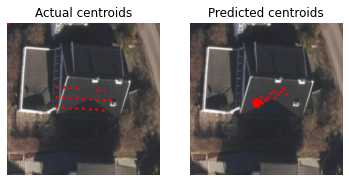

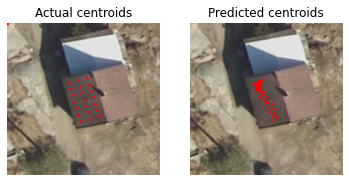

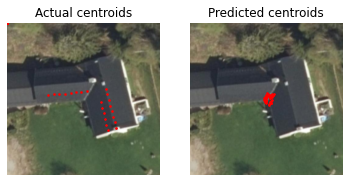

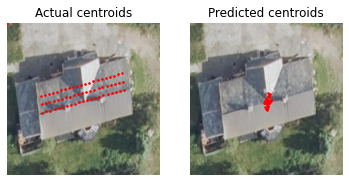

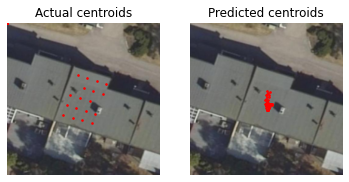

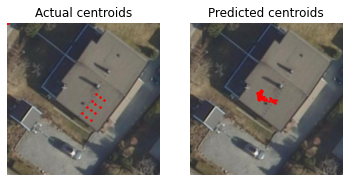

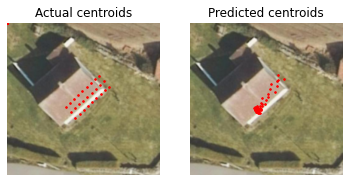

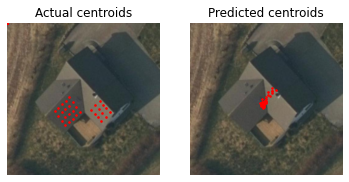

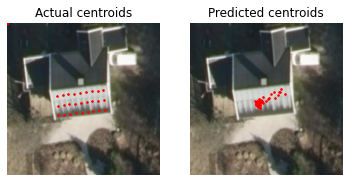

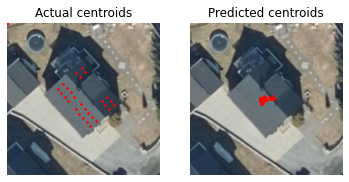

[tensor([[[ 1.1890e+02,  1.6203e+02],
          [ 1.0923e+02,  1.5602e+02],
          [ 1.1498e+02,  1.5297e+02],
          [ 1.1520e+02,  1.5157e+02],
          [ 1.1998e+02,  1.4818e+02],
          [ 1.1464e+02,  1.4129e+02],
          [ 1.2588e+02,  1.4175e+02],
          [ 1.1858e+02,  1.3619e+02],
          [ 1.2509e+02,  1.3053e+02],
          [ 1.2776e+02,  1.2939e+02],
          [ 1.3020e+02,  1.2555e+02],
          [ 1.2436e+02,  1.2007e+02],
          [ 1.3446e+02,  1.2046e+02],
          [ 1.3068e+02,  1.1608e+02],
          [ 1.3139e+02,  1.1723e+02],
          [ 1.3354e+02,  1.1778e+02],
          [ 1.3792e+02,  1.1556e+02],
          [ 1.3371e+02,  1.1040e+02],
          [ 1.3916e+02,  1.1457e+02],
          [ 1.3669e+02,  1.1114e+02],
          [ 1.3845e+02,  1.0872e+02],
          [ 1.3773e+02,  1.0925e+02],
          [ 1.3573e+02,  1.0878e+02],
          [ 1.3123e+02,  1.0591e+02],
          [ 1.3592e+02,  1.0760e+02],
          [ 1.3418e+02,  1.0692e+02],
          [ 

In [25]:
test_model(model, train_loader, 10)

## Loss plot

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
val_los = pd.read_csv('C:/Users/guzma/OneDrive/Documents/TEC/DTU/02456/Project/Github_Project/autotetris/Loss_models/val_loss_1.csv')
train_los = pd.read_csv('C:/Users/guzma/OneDrive/Documents/TEC/DTU/02456/Project/Github_Project/autotetris/Loss_models/train_loss_1.csv')

In [14]:
val20 = val_los.iloc[:20,:]

In [15]:
val.shape

(1049, 1)

In [16]:
val20.shape

(20, 1)

In [17]:
val = val_los.iloc[::105, :]
train = train_los.iloc[::941, :]

In [25]:
train2 = train_los.iloc[::941, :]

In [40]:
train2.reset_index(inplace=True)

ValueError: cannot insert level_0, already exists

In [43]:
train2.drop(columns=['level_0','index'], inplace=True)
train2

C:\Users\guzma\AppData\Local\Temp\ipykernel_18816\3837973511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2.drop(columns=['level_0','index'], inplace=True)


,1.294015000000000000e+06
0,1.125530e+06
1,4.022439e+04
2,1.940538e+04
3,3.970102e+04
4,2.095240e+04
5,3.801930e+04
6,2.556768e+04
7,2.591401e+04
8,3.469649e+04
9,1.694255e+04


In [47]:
val.reset_index(inplace=True)
val.drop(columns=['index'], inplace=True)

C:\Users\guzma\AppData\Local\Temp\ipykernel_18816\1677657292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val.drop(columns=['index'], inplace=True)


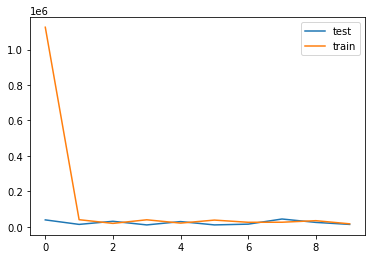

In [50]:
plt.plot(val, label='test')
plt.plot(train2, label='train')
plt.legend()
plt.show()

<AxesSubplot:>

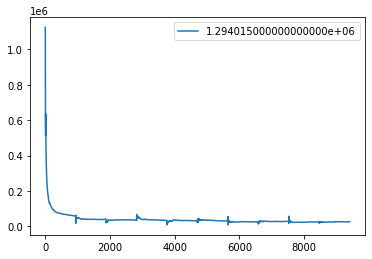

In [17]:
train_los.plot()
plt.title('Train Loss')

Text(0.5, 1.0, 'Validation Loss')

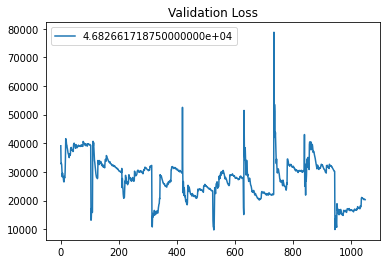

In [20]:
val_los.plot()
plt.title('Validation Loss')